# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


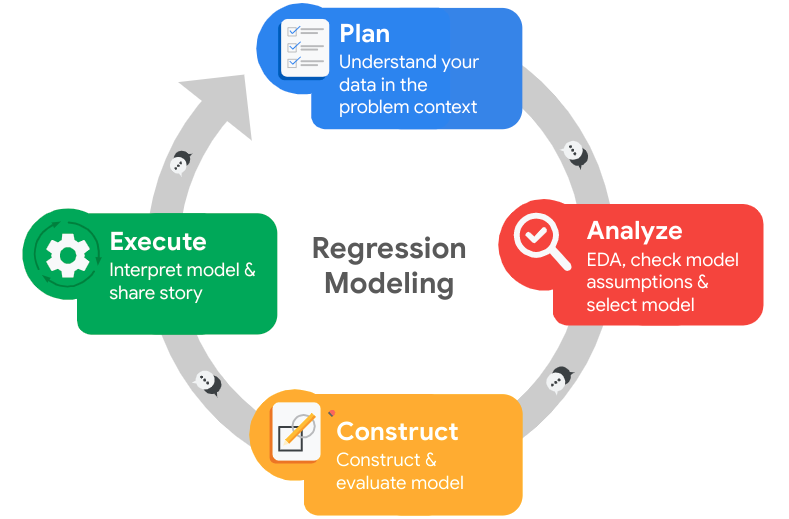

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
### YOUR CODE HERE ### 
# Import for data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
### YOUR CODE HERE ###
df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_monthly_hours    False
tenure                   False
work_accident            False
left                     False
promotion_last_5years    False
department               False
salary                   False
dtype: bool

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

In [9]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df1 = df0.drop_duplicates(keep = 'first')

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

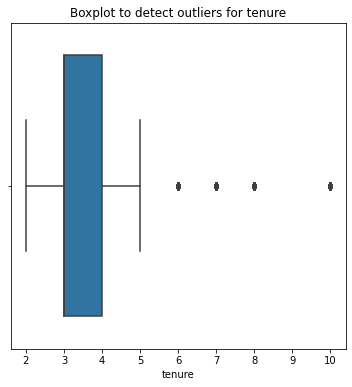

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for tenure', fontsize=12)
sns.boxplot(df1['tenure'])
plt.show()


In [12]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###

# Compute the 25th and 75th percentile in `tenure`
percentile25 = df1['tenure'].quantile(0.25)
percentile75 = df1['tenure'].quantile(0.75)

# Compute the IQR in `tenure`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `tenure` using conditional masking
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

# Count how many rows in the data contain outliers in `tenure`
print("Number of rows containing outliers in `tenure`:", len(outliers))


Lower limit: 1.5
Upper limit: 5.5
Number of rows containing outliers in `tenure`: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print(df1['left'].value_counts())

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print()
print(df1['left'].value_counts(normalize=True))

0    10000
1     1991
Name: left, dtype: int64

0    0.833959
1    0.166041
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

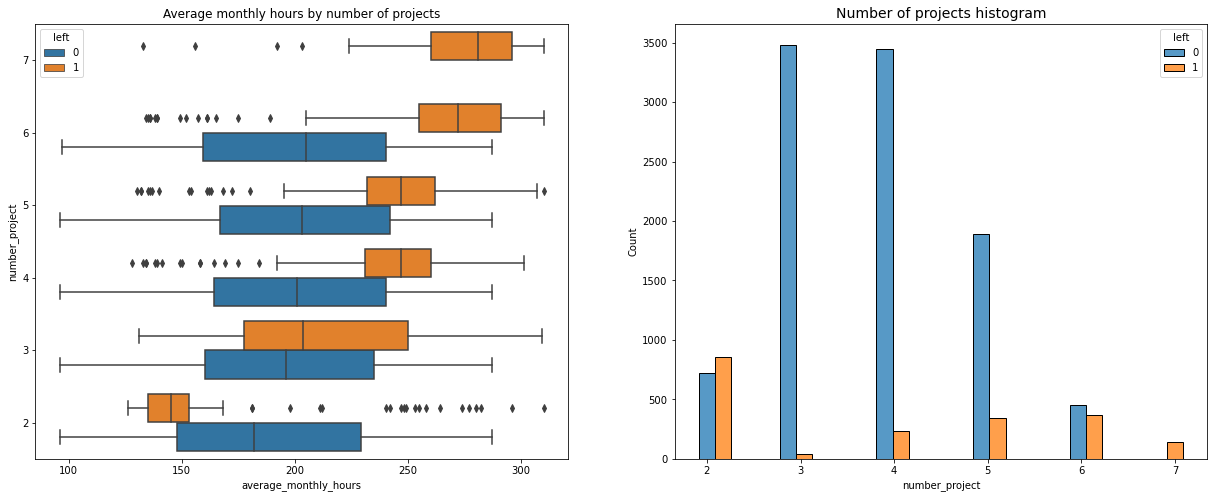

In [14]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, ax = plt.subplots(1, 2, figsize=(21,8))

#Boxplot to visualise average monthly hours by number of projects; comparing between 
#employees who have left with those who have stayed
sns.boxplot(data = df1, x ='average_monthly_hours', y ='number_project', hue ='left', orient ='h', ax=ax[0])
ax[0].set_title('Average monthly hours by number of projects')
ax[0].invert_yaxis()

#Histogram showing distribution of 'number_project', comparing employees who have left with those who have stayed
sns.histplot(data = df1, x ='number_project', hue ='left', multiple ='dodge', shrink =2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

plt.show()



From the boxplot above, we can see that people who take on more projects tend to work longer hours. However there are also a few particular points that can be inferred from these visualisations.

1. There are 2 groups of employees who have left the company: The first group worked considerably lesser average hours per month compared to employees who stayed while contributing to two projects. The other group of employees who left are those who worked considerably more average hours per month compared to employees who stayed while contributing to the same number of projects. The employees who belong in the first group may possibly have been fired or are serving their notice period and hence, working lesser hours since they were leaving the company. Whereas for the other group of employees, it is reasonable to infer that they may have quit due to the significant hours and project load they have been contributing to.

2. All employees who have contributed to 7 projects have left the company. The interquartile range of those who contribute 6 or more projects also worked between 255-295 hours per month which is much more than any other groups of employees. 

3. The ideal number of projects for each employee to undertake seems to be 3 to 4 projects. The histogram shows that the ratio of employees who stayed:left is much higher than other groups employees taking >4 projects.

4. If we were to assume that an average work week is 40 hours and there is 2 weeks of vacation per year, then the average number of hours per month of employees working 5 days a week is: (50 week x 40 hrs/week) / 12mths = 166.67 hrs/mth. This means that aside from employees who work on 2 projects, every other group of employees including those who stayed are working considerably longer hours than usual. It is possible that the employees may be overworked.  

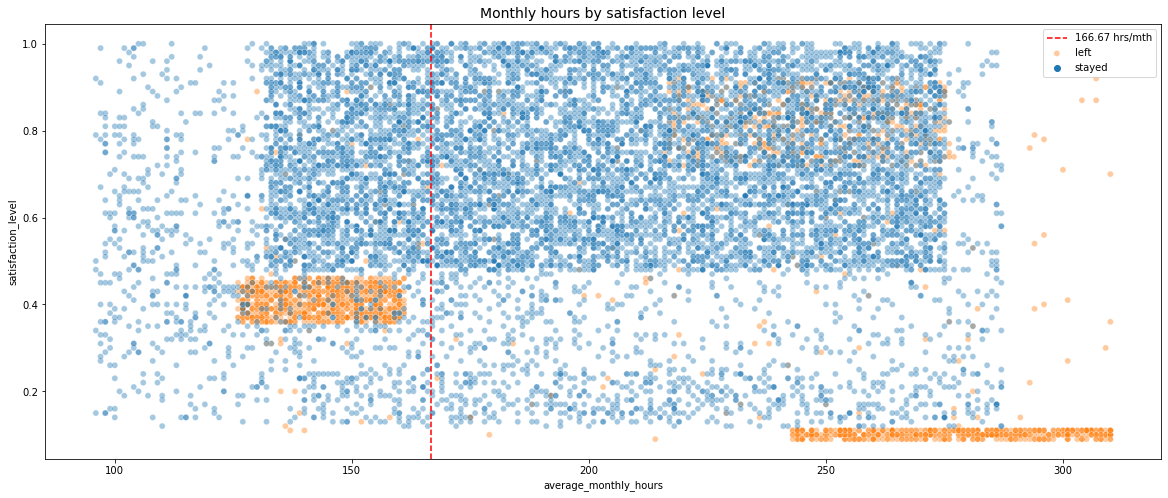

In [15]:
# Create a plot as needed
### YOUR CODE HERE ###

# Create scatterplot of `average_monthly_hours` vs `satisfaction_level`, comparing employees who stayed versus those who left
plt.figure(figsize=(20, 8))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='r', label='166.67 hrs/mth', ls='--')
plt.legend(labels=['166.67 hrs/mth', 'left', 'stayed'])
plt.title('Monthly hours by satisfaction level', fontsize='14');

The scatterplot above shows a distinct group of ex-employees who worked ~240-320 hours per month. Significantly higher than the average of 166.67 hours per month for a typical full-time employee. It is not unusual for the satisfaction levels of this group of overworked employees to be near 0.

There is also another group of employees who left that have worked more usual hours, lesser than the 166.67 hours per month mark. However, their satisfaction levels were around 0.4 as well. It's difficult to speculate the reasons why they might leave but one possibility is the pressure they feel from other colleagues who are working significantly longer hours than they are, causing them to feel that they are unable/have to contribute more. 

Finally there is also a group of employees who left that are working ~210-280 hours per month with high satisfaction levels between 0.7-0.9. 

Note the strange shape for the distribution of the data here which is indicative of data manipulation or synthetic data. 

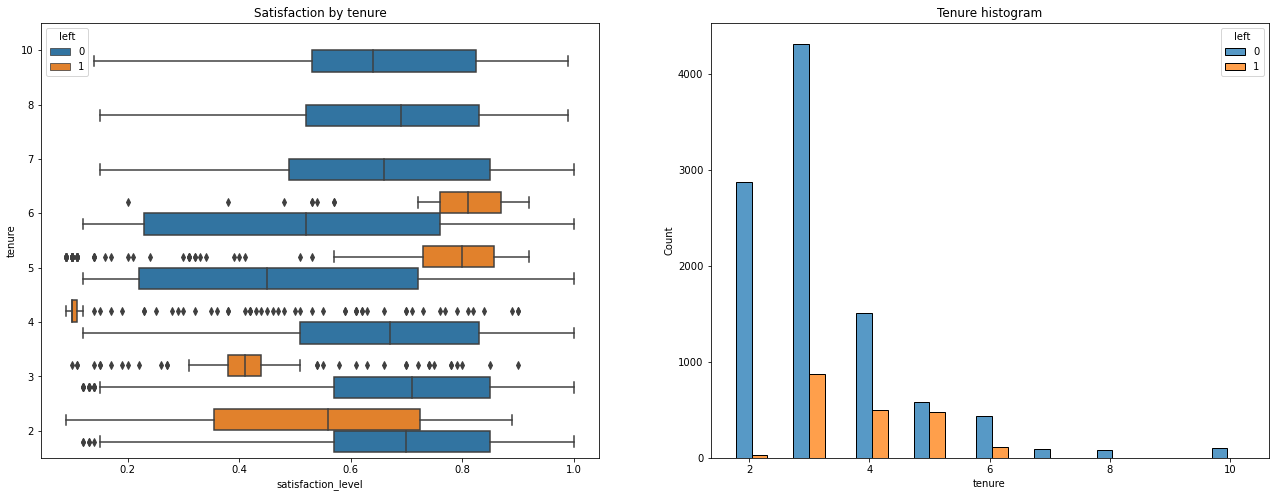

In [16]:
# Create a plot as needed
### YOUR CODE HERE ###

fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure')

# Create histogram showing distribution of `tenure`, comparing employees who stayed versus those who left
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=6, ax=ax[1])
ax[1].set_title('Tenure histogram')

plt.show()

From the box plot and histogram shown, it can be observed that employees who left fall into 2 categories: 1) Unsatisfied employees with shorter tenures and highly satisfied employees with medium-term tenures. 

Employees who left aft 4 years also have very low satisfaction levels. It may be worth investigating changes in company policies that may have affected employees specifically at the 4 years mark if possible. 

Employees who have been tenured for 7 years and longer have also remained in the company without leaving, with satisfaction levels similar to those of newer joining colleagues. The counts of the loyal employees is rather low, indicating that they may be employees with higher positions or salaries. 


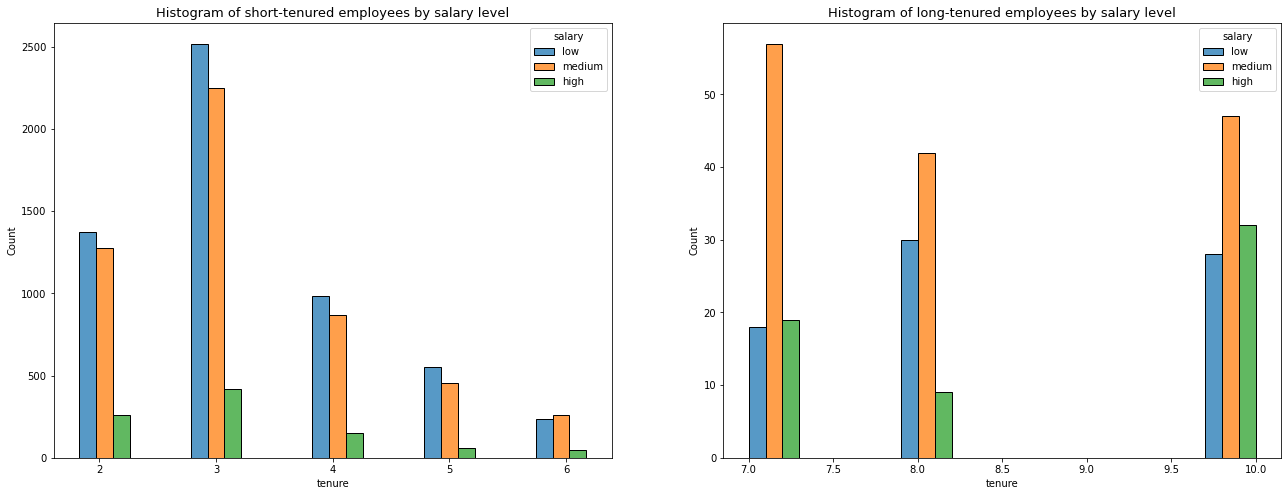

In [17]:
# Create a plot as needed
### YOUR CODE HERE ###

fig, ax = plt.subplots(1, 2, figsize = (22,8))

#Create dataframe subsets of long and short-tenured employees
tenure_short = df1[df1['tenure'] < 7]
tenure_long = df1[df1['tenure'] > 6]

#Create histogram showing distribution of short-tenured employees, comparing salary levels
sns.histplot(data = tenure_short, x ='tenure', hue = 'salary', hue_order = ['low', 'medium', 'high'],
             multiple = 'dodge', shrink = 5, ax = ax[0])
ax[0].set_title('Histogram of short-tenured employees by salary level', fontsize='13')

#Create histogram showing distribution of long-tenured employees, comparing salary levels
sns.histplot(data = tenure_long, x ='tenure', hue = 'salary', hue_order = ['low', 'medium', 'high'],
             multiple = 'dodge', ax = ax[1])
ax[1].set_title('Histogram of long-tenured employees by salary level', fontsize='13')

plt.show()


The histograms above shows that long tenured employees were not disproportionately comprised of higher-paid employees. 


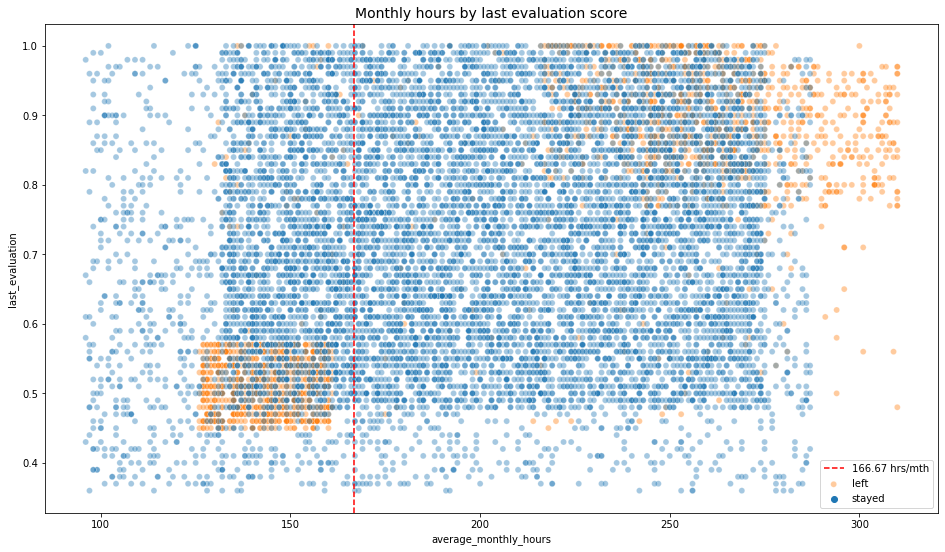

In [18]:
# Create a plot as needed
### YOUR CODE HERE ###
# Create scatterplot of `average_monthly_hours` versus `last_evaluation`
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='r', label='166.67 hrs/mth', ls='--')
plt.legend(labels=['166.67 hrs/mth', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14')
plt.show()

The following observations can be made from the scatterplot above:

- The scatterplot indicates two groups of employees who left: overworked employees who performed very well and employees who worked slightly under the monthly average of 166.67 hours with lower evaluation scores.

- There seems to be a correlation between hours worked and evaluation score.

- There isn't a high percentage of employees in the upper left quadrant of this plot (working less hours while having high evaluation scores); but working long hours doesn't guarantee a good evaluation score either.


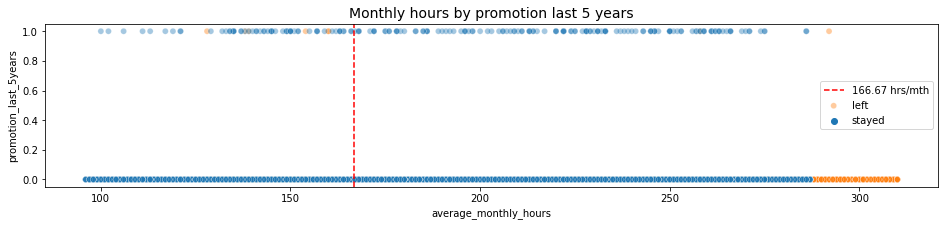

In [19]:
# Create plot to examine relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='r', ls='--')
plt.legend(labels=['166.67 hrs/mth', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14')
plt.show()

The following observations can be made from the scatterplot above: 

- There isn't many employees who left the organisation when they were promoted within the last 5 years even when they worked higher than the average normal working hours of 166.67 hours per month. 
- However, there were employees who have worked long hours and left the company without being promoted in the last 5 years. 
- Most of the employees who left were working significantly longer hours. 

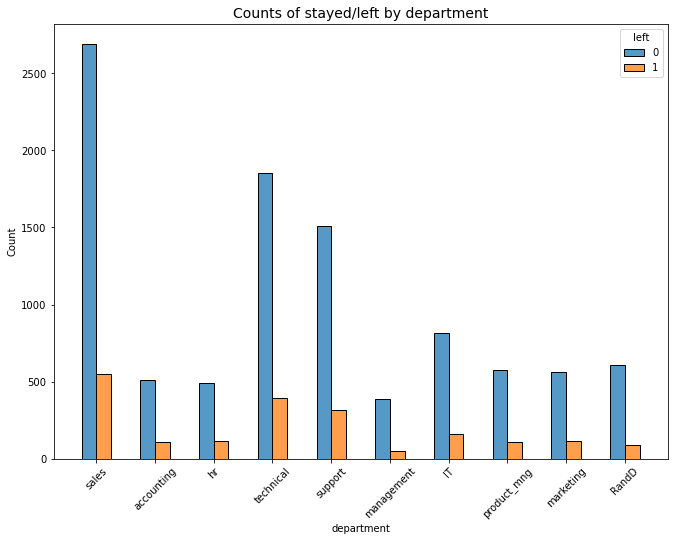

In [20]:
# Create stacked histogram to compare department distribution of employees who left to that of employees who didn't
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='department', hue='left', 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation='45')
plt.title('Counts of stayed/left by department', fontsize=14)
plt.show()

The histogram above shows that there does not seem to be any disproportion between departments for the ratio of employees who stayed versus those who left.  

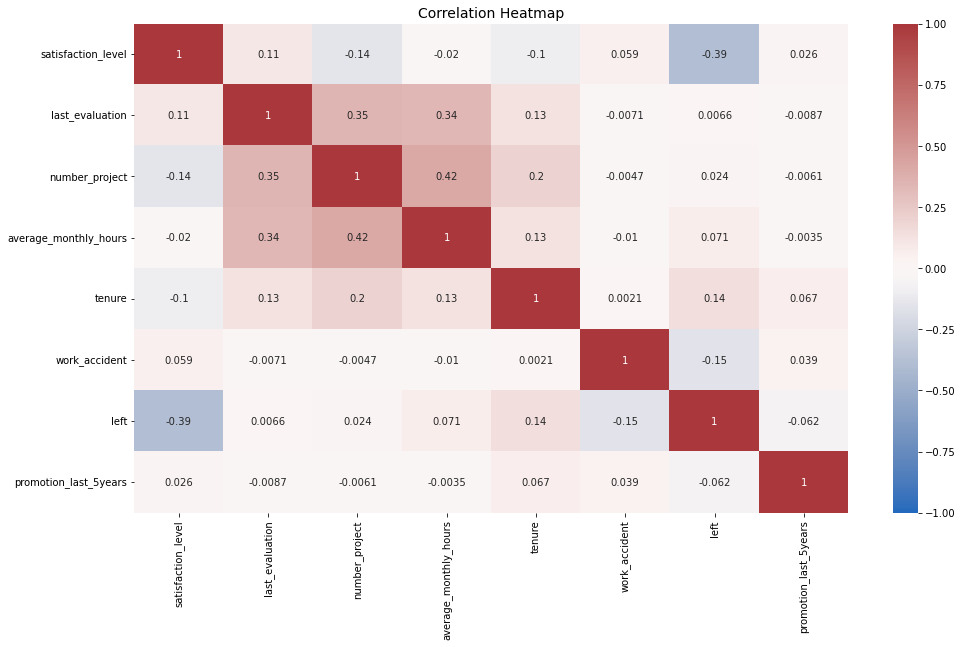

In [21]:
plt.figure(figsize=(16, 9))
#Correlation heatmap 
heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14})
plt.show()

The correlation heatmap confirms that the number of projects, monthly hours, and evaluation scores all have some positive correlation with each other, and whether an employee leaves is negatively correlated with their satisfaction level.

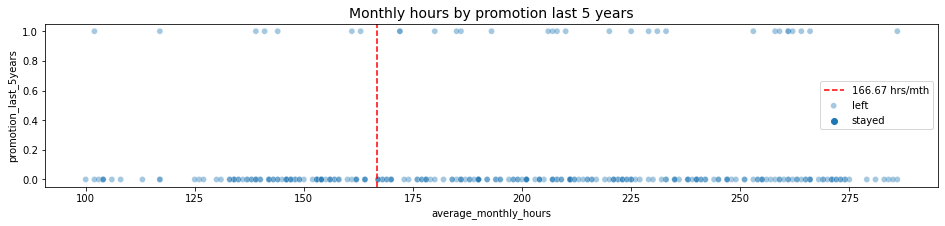

In [22]:
# Create plot to examine relationship between `average_monthly_hours` and `promotion_last_5years`, for long-tenured employees
plt.figure(figsize=(16, 3))
sns.scatterplot(data=tenure_long, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='r', ls='--')
plt.legend(labels=['166.67 hrs/mth', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14')
plt.show()

This scatterplot is similar to a previous scatter plot to visualise the relationship between monthly hours and promotion in the last 5 years. Now we are taking a closer look at employees who have stayed >6 years and it can be observed that only a minority of these long tenured employees have been promoted in the last 5 years despite many working long hours. However, it should be noted that long-tenured employees have also showed high satisfaction levels. 

### Insights

It appears that employees are leaving the company as a result of overworking which is potentially caused by poor management. Leaving is tied to longer working hours, many projects, and generally lower satisfaction levels. It can be ungratifying to work long hours and not receive promotions or good evaluation scores. There's a sizeable group of employees at this company who are probably feeling burnt out. It also appears that if an employee has spent more than six years at the company, they tend not to leave.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

The goal is to predict whether an employee leaves the company, which is a categorical outcome variable. So this task involves binary classification since the outcome variable 'left' can be either 1 (indicating employee left) or 0 (indicating employee didn't leave).

### Identify the types of models most appropriate for this task.

Logistic Regression, Decision Tree, Random Forest and XGBoost may be appropriate for this task and comparison between the performance of this models will allow us to choose the best model for deployment. 

### Modeling :Logistic Regression 

In [23]:
### YOUR CODE HERE ###
df_enc = df1.copy()

# Encode the `salary` column as an ordinal numeric category
df_enc['salary'] = (df_enc['salary'].astype('category').cat.set_categories(['low', 'medium', 'high']).cat.codes)

# Dummy encode the `department` column
df_enc = pd.get_dummies(df_enc, drop_first=False)

# Display the new dataframe
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


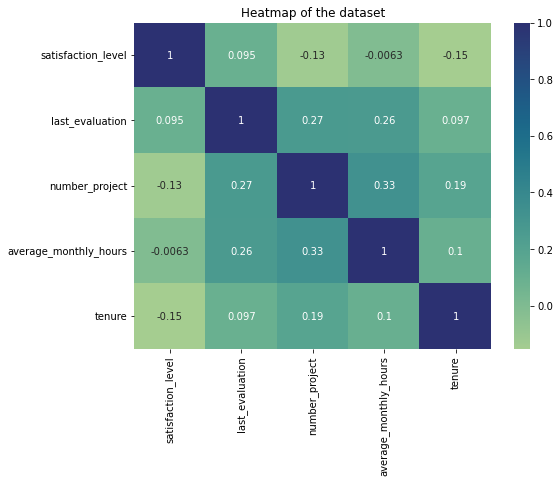

In [24]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

In [25]:
#Since logistic regression is quite sensitive to outliers, 
#it would be a good idea at this stage to remove the outliers in the tenure column that were identified earlier.
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]
df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [26]:
# Isolate the outcome variable
y = df_logreg['left']
print(y.head()) 


0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64


In [27]:
#Create new X dataframe containing features
X = df_logreg.drop('left', axis=1) 
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [28]:
#Split data in training and testing sets 
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.25, stratify=y_tr, random_state=42)
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape
#Result is 60% training dataset to be used for hyperparameter tuning, 20% validation dataset to evaluate each models 
#and 20% test data set that will be used to evaluate only the champion

((6699, 18), (2234, 18), (2234, 18), (6699,), (2234,), (2234,))

In [29]:
# Construct a logistic regression model and fit it to the training dataset
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)
# Use the logistic regression model to get predictions on the validation set
y_pred = log_clf.predict(X_val)

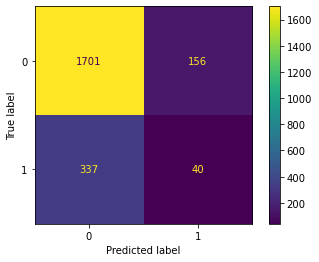

In [30]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

In [31]:
#Check the class balance in the data.
df_logreg['left'].value_counts(normalize=True)

0    0.831468
1    0.168532
Name: left, dtype: float64

There is an approximately 83%-17% split. So the data is not perfectly balanced, but it is not too imbalanced. If it was more severely imbalanced, we might resample the data to make it more balanced. In this case, you can use this data without modifying the class balance and continue evaluating the model.

In [32]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_val, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.94      0.90      1858
    Predicted would leave       0.46      0.24      0.32       376

                 accuracy                           0.83      2234
                macro avg       0.66      0.59      0.61      2234
             weighted avg       0.79      0.83      0.80      2234



The classification report above shows that the logistic regression model achieved a precision of 79%, recall of 83%, f1-score of 80% (all weighted averages), and accuracy of 82%. However, if it's most important to predict employees who leave, then the scores are significantly lower

### Modeling : Decision Tree

In [33]:
# Isolate the outcome variable
y = df_enc['left']
# Select the features
X = df_enc.drop('left', axis=1)
#Split data in training and testing sets
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.25, stratify=y_tr, random_state=42)
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((7194, 18), (2398, 18), (2399, 18), (7194,), (2398,), (2399,))

In [34]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=42)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=5, refit='roc_auc')

In [35]:
%%time
tree1.fit(X_train, y_train)

CPU times: user 3.12 s, sys: 46.5 ms, total: 3.16 s
Wall time: 3.16 s


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         

In [36]:
# Check best parameters
tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [37]:
# Check best AUC score on CV
tree1.best_score_

0.9704772988997107

In [38]:
y_pred = tree1.best_estimator_.predict(X_val)

In [39]:
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_val, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.98      0.98      0.98      2000
    Predicted would leave       0.92      0.92      0.92       398

                 accuracy                           0.97      2398
                macro avg       0.95      0.95      0.95      2398
             weighted avg       0.97      0.97      0.97      2398



The classification report above shows that the decision tree model achieved a precision, recall, f1-score of 98% (all weighted averages), and accuracy of 98%. All of these scores from the decision tree model are strong indicators of good model performance. However, decision trees can be vulnerable to overfitting, and random forests avoid overfitting by incorporating multiple trees in an ensemble to make predictions. We will begin random forest model construction next. 

### Modeling : Random Forest

In [40]:
# Instantiate model
rf = RandomForestClassifier(random_state=42)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='roc_auc')

In [41]:
%%time
rf1.fit(X_train, y_train)

CPU times: user 9min 56s, sys: 1.59 s, total: 9min 58s
Wall time: 9min 58s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [42]:
# Define a path to the folder where you want to save the model
path = '/home/jovyan/work/'

In [43]:
#def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

   # with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [44]:
def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [45]:
# Write pickle
#write_pickle(path, rf1, 'hr_rf1')

In [46]:
# Read pickle
rf1 = read_pickle(path, 'hr_rf1')

In [47]:
# Check best AUC score on CV
rf1.best_score_

0.9786085545485953

In [48]:
# Check best params
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

In [49]:
# Get all CV scores
y_pred = rf1.best_estimator_.predict(X_val)
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_val, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.99      0.99      0.99      2000
    Predicted would leave       0.95      0.92      0.94       398

                 accuracy                           0.98      2398
                macro avg       0.97      0.96      0.96      2398
             weighted avg       0.98      0.98      0.98      2398



The classification report above shows that evaluation scores of the random forest model are slightly better than those of the decision tree model for predicting employees who would leave. This indicates that the random forest model slightly outperforms the decision tree and logistic regression models.

In [50]:
def get_scores(model_name:str, model, X_val_data, y_val_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_val_data)

    auc = roc_auc_score(y_val_data, preds)
    accuracy = accuracy_score(y_val_data, preds)
    precision = precision_score(y_val_data, preds)
    recall = recall_score(y_val_data, preds)
    f1 = f1_score(y_val_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [51]:
rf1_val_scores = get_scores('random forest1 test', rf1, X_val, y_val)
rf1_val_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest1 test,0.950904,0.924623,0.93758,0.979566,0.957562


There is a chance that there is some data leakage occurring. Data leakage is when we use data to train our model that should not be used during training, either because it appears in the test data or because it's not data that you'd expect to have when the model is actually deployed. Training a model with leaked data can give an unrealistic score that is not replicated in production.

In this case, it's likely that the company won't have satisfaction levels reported for all of its employees. It's also possible that the average_monthly_hours column is a source of some data leakage. If employees have already decided upon quitting, or have already been identified by management as people to be fired, they may be working fewer hours.

The first round of decision tree and random forest models included all variables as features. This next round will incorporate feature engineering to build improved models.

We can proceed by dropping satisfaction_level and creating a new feature that roughly captures whether an employee is overworked. We can call this new feature overworked and it will be a binary variable.

In [52]:
# Drop `satisfaction_level` and save resulting dataframe in new variable
df2 = df_enc.drop('satisfaction_level', axis=1)

# Display first few rows of new dataframe
df2.head()

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [53]:
# Create `overworked` column. For now, it's identical to average monthly hours.
df2['overworked'] = df2['average_monthly_hours']

# Inspect max and min average monthly hours values
print('Max hours:', df2['overworked'].max())
print('Min hours:', df2['overworked'].min())

Max hours: 310
Min hours: 96


166.67 is approximately the average number of monthly hours for someone who works 50 weeks per year, 5 days per week, 8 hours per day.

We can define being overworked as working more than 175 hours per month on average.


In [54]:
# Define `overworked` as working > 175 hrs/week
df2['overworked'] = (df2['overworked'] > 175).astype(int)

# Display first few rows of new column
df2['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int64

In [55]:
# Drop the `average_monthly_hours` column
df2 = df2.drop('average_monthly_hours', axis=1)

# Display first few rows of resulting dataframe
df2.head()

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.86,5,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0.88,7,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0.87,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.52,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [56]:
y = df2['left']

# Select the features
X = df2.drop('left', axis=1)

In [57]:
#Split data in training and testing sets
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.25, stratify=y_tr, random_state=42)
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((7194, 17), (2398, 17), (2399, 17), (7194,), (2398,), (2399,))

### Modeling : Decision Tree 2

In [64]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=5, refit='roc_auc')

In [65]:
%%time
tree2.fit(X_train, y_train)

CPU times: user 2.44 s, sys: 277 µs, total: 2.44 s
Wall time: 2.44 s


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [66]:
# Check best params
tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [71]:
# Check best AUC score on CV
tree2.best_score_

0.9579071055842677

In [74]:
y_pred = tree2.best_estimator_.predict(X_val)
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_val, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.98      0.95      0.97      2000
    Predicted would leave       0.79      0.90      0.84       398

                 accuracy                           0.94      2398
                macro avg       0.88      0.93      0.90      2398
             weighted avg       0.95      0.94      0.95      2398



This model performs very well, even without satisfaction levels and detailed hours worked data. Some of the other scores fell but that's to be expected given fewer features were taken into account in this round of the model. Still, the scores are very good.

#### Random forest - Round 2

In [86]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='roc_auc')

In [87]:
%%time
rf2.fit(X_train, y_train)

CPU times: user 7min 30s, sys: 1.06 s, total: 7min 31s
Wall time: 7min 31s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [88]:
# Write pickle
#write_pickle(path, rf2, 'hr_rf2')

In [89]:
# Read in pickle
rf2 = read_pickle(path, 'hr_rf2')

In [90]:
# Check best params
rf2.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 500}

In [91]:
rf2_val_scores = get_scores('random forest2 test', rf2, X_val, y_val)
tree2_val_scores = get_scores('tree2 test', tree2, X_val, y_val)
print(rf2_val_scores)
print(tree2_val_scores)

                 model  precision    recall        f1  accuracy       AUC
0  random forest2 test   0.861575  0.907035  0.883721  0.960384  0.939018
        model  precision    recall        f1  accuracy       AUC
0  tree2 test   0.787746  0.904523  0.842105  0.943703  0.928011


Again, the scores dropped slightly compared to rf1 model, but the random forest performs better than the decision tree if using AUC as the deciding metric. We will now build an XG boost model to compare alongside the new decision tree and random forest models as well. 

In [92]:
# Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [3,8, None],
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [300, 500]
             }

# Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='roc_auc')

In [93]:
%%time
xgb_cv.fit(X_train, y_train)

CPU times: user 6min 55s, sys: 2.85 s, total: 6min 57s
Wall time: 3min 29s


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     objective='binary:logistic',
                                     predictor=None, random_state=0,
                                     reg_alpha=None, ...),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.

In [94]:
# Check best params
xgb_cv.best_params_

{'learning_rate': 0.01,
 'max_depth': None,
 'min_child_weight': 5,
 'n_estimators': 500}

In [95]:
y_pred = xgb_cv.best_estimator_.predict(X_val)
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_val, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.98      0.98      0.98      2000
    Predicted would leave       0.90      0.90      0.90       398

                 accuracy                           0.97      2398
                macro avg       0.94      0.94      0.94      2398
             weighted avg       0.97      0.97      0.97      2398



In [97]:
xgb_val_scores = get_scores('XGBoost test', xgb_cv, X_val, y_val)
rf2_val_scores = get_scores('random forest2 test', rf2, X_val, y_val)
tree2_val_scores = get_scores('tree2 test', tree2, X_val, y_val)
print(xgb_val_scores)
print()
print(rf2_val_scores)
print()
print(tree2_val_scores)

          model  precision    recall        f1  accuracy       AUC
0  XGBoost test   0.903797  0.896985  0.900378  0.967056  0.938992

                 model  precision    recall        f1  accuracy       AUC
0  random forest2 test   0.861575  0.907035  0.883721  0.960384  0.939018

        model  precision    recall        f1  accuracy       AUC
0  tree2 test   0.787746  0.904523  0.842105  0.943703  0.928011


The results show that rf2 model is the champion model when using ROC AUC as the deciding metric. Hence, we will proceed with evaluation of the rf2 model against the test data set after refitting the model with the training and validation data sets combined (X_tr and y_tr). 

In [98]:
%%time
rf2.fit(X_tr, y_tr)

CPU times: user 9min 19s, sys: 985 ms, total: 9min 20s
Wall time: 9min 20s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [99]:
# Write pickle
#write_pickle(path, rf2, 'hr_rf2')

In [100]:
# Read pickle
rf2 = read_pickle(path, 'hr_rf2')

In [101]:
# Check best params
rf2.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [102]:
# Get predictions on test data using newly fitted rf2 model
rf2_test_scores = get_scores('random forest2 test', rf2, X_test, y_test)
rf2_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest2 test,0.830317,0.922111,0.87381,0.955815,0.942315


In [103]:
y_pred = rf2.best_estimator_.predict(X_test)
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.98      0.96      0.97      2001
    Predicted would leave       0.83      0.92      0.87       398

                 accuracy                           0.96      2399
                macro avg       0.91      0.94      0.92      2399
             weighted avg       0.96      0.96      0.96      2399



Evaluating the champion (second random forest) model on the test dataset shows that the high evaluation scores are still consistent and that the model is stable and performing highly. 

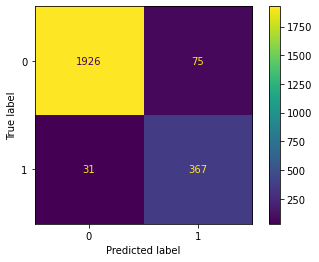

In [106]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=rf2.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf2.classes_)
disp.plot(values_format='')
plt.show()

The model predicts more false positives than false negatives, which means that more employees may be identified as at risk of quitting or getting fired, when that's actually not the case. But this is still a strong model.

For exploratory purpose, we inspect the splits of the decision tree model and the most important features in the random forest model.

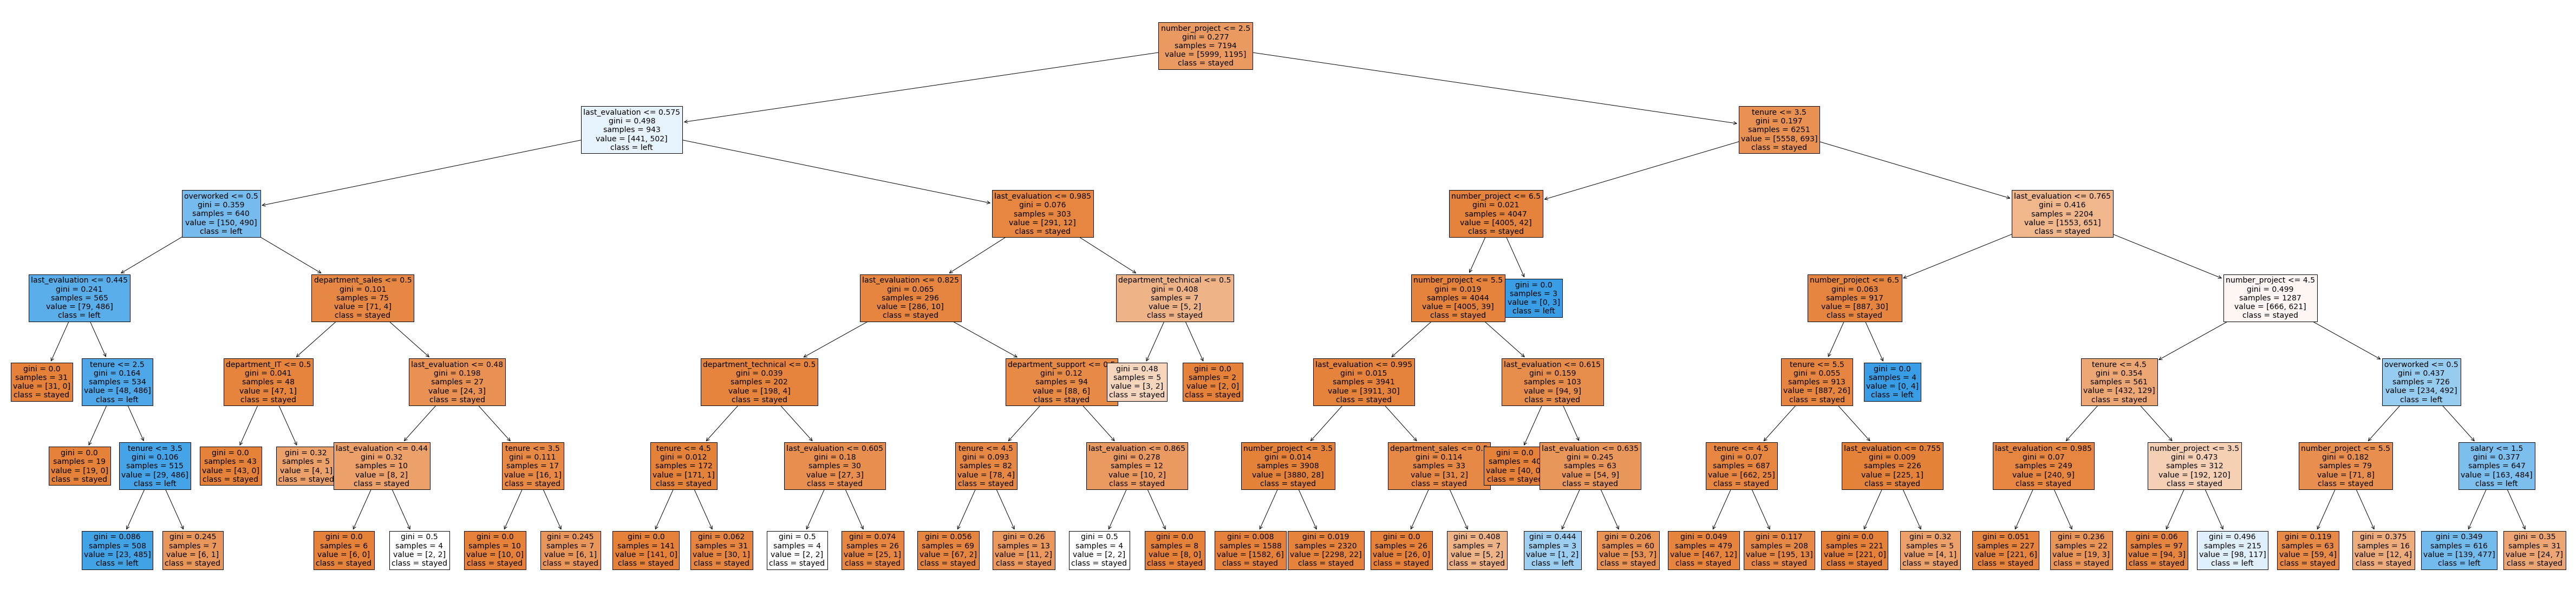

In [107]:
# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(tree2.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

In [108]:
#tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns=X.columns)
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

,gini_importance
last_evaluation,0.342490
number_project,0.326925
tenure,0.215100
overworked,0.101187
salary,0.012385
department_sales,0.000824
department_technical,0.000635
department_IT,0.000250
department_support,0.000203


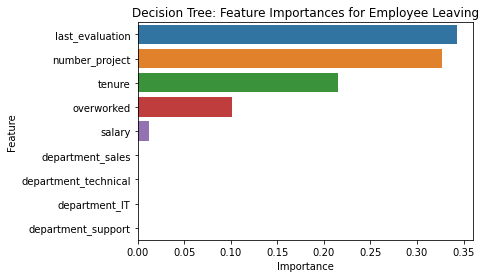

In [109]:
sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

The barplot above shows that in this decision tree model, last_evaluation, number_project, tenure, and overworked have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, left.

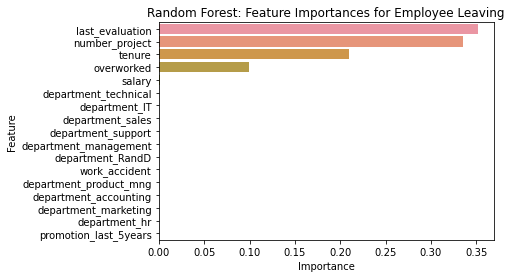

In [114]:
rf2_importances = pd.DataFrame(rf2.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
rf2_importances = rf2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
rf2_importances = rf2_importances[rf2_importances['gini_importance'] != 0]

sns.barplot(data=rf2_importances, x="gini_importance", y=rf2_importances.index, orient='h')
plt.title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

The plot above shows that in this champion random forest model (rf2), last_evaluation, number_project, tenure, and overworked have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, left, and they are the same as the ones used by the decision tree model.

Now we will train the champion model on the entire dataset to make full use of data available and improve predictive power of the model for future deployment. 

In [115]:
%%time
champion_model = rf2.fit(X, y)

CPU times: user 11min 16s, sys: 1.11 s, total: 11min 17s
Wall time: 11min 17s


In [116]:
# Write pickle
#write_pickle(path, champion_model, 'hr_champion_model')

In [117]:
# Read pickle
champion_model = read_pickle(path, 'hr_champion_model')

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of Model Results

Logistic Regression

The logistic regression model achieved precision of 80%, recall of 83%, f1-score of 80% (all weighted averages), and accuracy of 83%, on the validation set.

Tree-based Machine Learning

After conducting feature engineering, the decision tree model achieved AUC of 93.8%, precision of 87.0%, recall of 90.4%, f1-score of 88.7%, and accuracy of 96.2%, on the test set. The random forest modestly outperformed the decision tree model and XGBoost model when evaluating using ROC AUC as the key metric.

### Conclusion, Recommendations, Next Steps

The models and the feature importances extracted from the models confirm that employees at the company are overworked.

To retain employees, the following recommendations could be presented to the stakeholders:

- Cap the number of projects that employees can work on.
- Consider promoting employees who have been with the company for atleast four years, or conduct further investigation about why four-year tenured employees are so dissatisfied.
- Either reward employees for working longer hours, or don't require them to do so.
- If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear.
- Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts.
- High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/are more efficient. 

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.